In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("employee_data.csv")

In [3]:
df

,Unnamed: 0,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,0,A,36,5,5,2297
1,1,1,A,55,3,5,1134
2,2,2,A,61,8,1,4969
3,3,3,O,29,3,6,902
4,4,4,O,34,6,2,3574
...,...,...,...,...,...,...,...
995,995,995,O,33,7,7,2996
996,996,996,O,21,1,2,667
997,997,997,O,49,9,7,4158
998,998,998,AB,56,6,7,2414


In [4]:
df=df.drop(["Unnamed: 0","id","groups"],axis=1)

In [5]:
df.head()

,age,healthy_eating,active_lifestyle,salary
0,36,5,5,2297
1,55,3,5,1134
2,61,8,1,4969
3,29,3,6,902
4,34,6,2,3574


In [6]:
df.isnull().sum()

age                 0
healthy_eating      0
active_lifestyle    0
salary              0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
age                 1000 non-null int64
healthy_eating      1000 non-null int64
active_lifestyle    1000 non-null int64
salary              1000 non-null int64
dtypes: int64(4)
memory usage: 31.4 KB


In [8]:
df.describe()

,age,healthy_eating,active_lifestyle,salary
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,41.155000,4.944000,5.683000,2227.46100
std,13.462995,2.013186,2.048587,1080.20976
min,18.000000,0.000000,0.000000,553.00000
25%,30.000000,4.000000,4.000000,1360.00000
50%,41.000000,5.000000,6.000000,2174.00000
75%,53.000000,6.000000,7.000000,2993.75000
max,64.000000,10.000000,10.000000,5550.00000


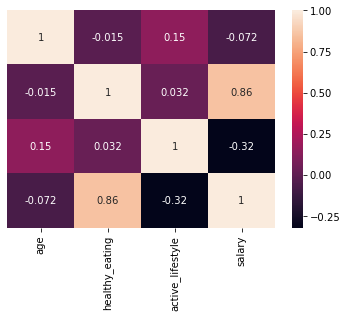

In [9]:
import seaborn as sns
sns.heatmap(df.corr(),yticklabels=False,annot=True)

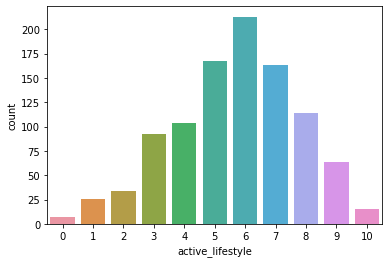

In [10]:
sns.countplot(df['active_lifestyle'],data=df)

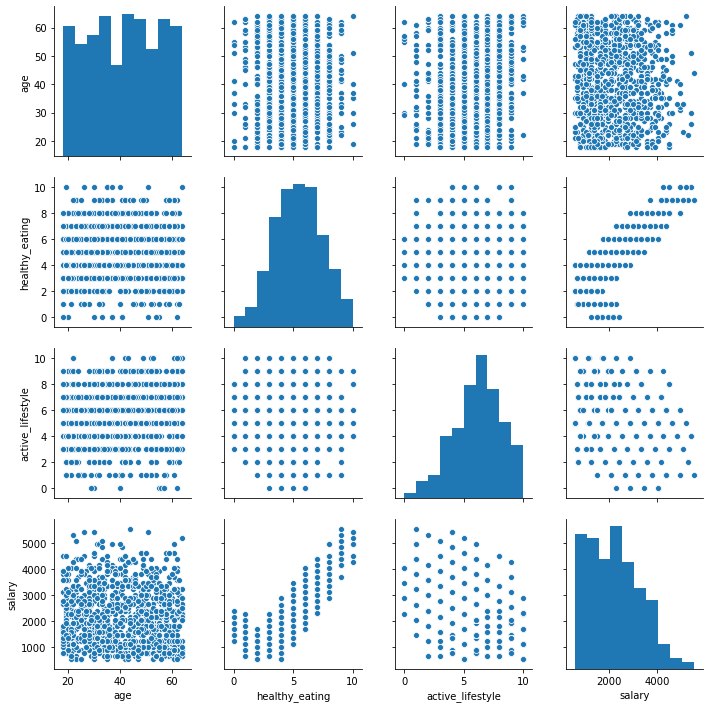

In [11]:
sns.pairplot(df)

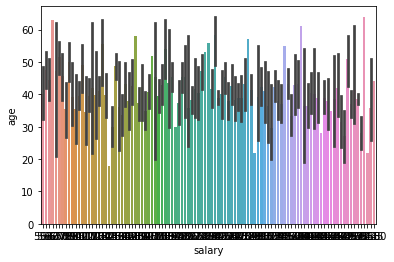

In [12]:
sns.barplot(y="age",x="salary",data=df)

In [13]:
df.shape

(1000, 4)

In [14]:
from scipy.stats import zscore
z_scr=zscore(df)
df1=df.loc[(abs(z_scr)<3).all(axis=1)]
print(df1.shape)

(999, 4)


In [15]:
x=df.iloc[:,0:3]
x.head(1)

,age,healthy_eating,active_lifestyle
0,36,5,5


In [16]:
x.skew()

age                -0.023806
healthy_eating      0.000047
active_lifestyle   -0.308004
dtype: float64

In [17]:
y=df['salary']
y.head(2)

0    2297
1    1134
Name: salary, dtype: int64

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
x=sc.transform(x)

In [19]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    rs=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            rs=r_state
            
    print("max r2 score corresponding to ",rs," is ",max_r_score)
    return rs

In [21]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
maxr2_score(lr,x,y)

max r2 score corresponding to  67  is  0.9296291826443184


In [22]:
from sklearn.model_selection import cross_val_score
print("r2 score for  linear regression: ",cross_val_score(lr,x,y,cv=5,scoring="r2"))


r2 score for  linear regression:  [0.87792059 0.86677949 0.83318756 0.79307558 0.90888616]


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [24]:
svr=SVR(kernel='linear',C=1)
maxr2_score(svr,x,y)

max r2 score corresponding to  75  is  0.6710392966478091


In [25]:
print(" r2 score for  svr: ",cross_val_score(svr,x,y,cv=5,scoring="r2"))

 r2 score for  svr:  [0.65442885 0.65732438 0.64034387 0.64632714 0.65820464]


In [26]:
from sklearn.linear_model import Ridge
rg=Ridge()
maxr2_score(rg,x,y)

max r2 score corresponding to  67  is  0.9293414702616224


In [27]:
print(" r2 score for  ridge: ",cross_val_score(svr,x,y,cv=5,scoring="r2"))

 r2 score for  ridge:  [0.65442885 0.65732438 0.64034387 0.64632714 0.65820464]


In [28]:
from sklearn.ensemble import RandomForestRegressor
parameters={"n_estimators":[10,100,500]}
rf=RandomForestRegressor()
clf = GridSearchCV(rf, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 100}

In [30]:
rf=RandomForestRegressor(n_estimators=100)
maxr2_score(rf,x,y)

max r2 score corresponding to  92  is  0.9990909534582759


In [31]:
print(" r2 score for  randomforest: ",cross_val_score(svr,x,y,cv=5,scoring="r2"))

 r2 score for  randomforest:  [0.65442885 0.65732438 0.64034387 0.64632714 0.65820464]


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 92,test_size=0.20)
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [37]:
print("r2_score is: ",r2_score(y_test,y_pred))

r2_score is:  0.9992867126890271


In [38]:
from sklearn.externals import joblib 
joblib.dump(rf, 'employee_salary_dataset_random_forest.pkl')

C:\Users\vishwaraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['employee_salary_dataset_random_forest.pkl']